# Machine Learning Introduction: Ames Residential Home Sales Data


### Importing Libraries

In [4]:
import pandas as pd
from matplotlib import pyplot as plt


### Load Data

In [6]:
ames = pd.read_csv('ames.csv')
ames.head(5)

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [35]:
ames.dtypes

Order               int64
PID                 int64
MS.SubClass         int64
MS.Zoning          object
Lot.Frontage      float64
                   ...   
Mo.Sold             int64
Yr.Sold             int64
Sale.Type          object
Sale.Condition     object
SalePrice           int64
Length: 82, dtype: object

### Data Analysis

In [12]:
ames.columns

Index(['Order', 'PID', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area',
       'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities',
       'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1',
       'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual',
       'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type',
       'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual',
       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1',
       'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF',
       'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt',
    

### Category Variables

In [13]:
# select categorical columns
ames_categorical = ames.select_dtypes(include=['object'])
ames_categorical.head(5)

,MS.Zoning,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,...,Garage.Type,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Pool.QC,Fence,Misc.Feature,Sale.Type,Sale.Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


##### Checking if the data is balanced

In [33]:
ames_categorical

,MS.Zoning,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,...,Garage.Type,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Pool.QC,Fence,Misc.Feature,Sale.Type,Sale.Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


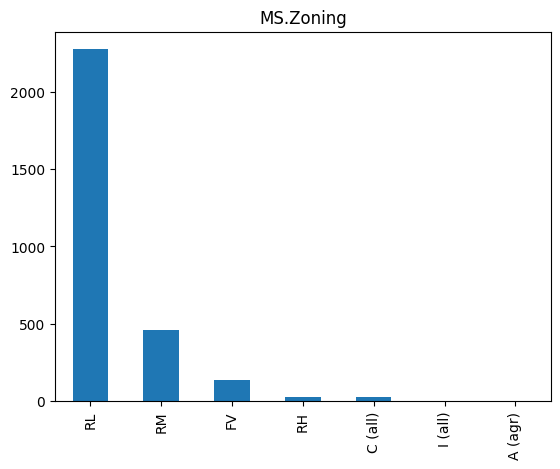

In [32]:
for col in ames_categorical.columns:
    plt.figure(10)
    ames_categorical[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()
    break


### Ordinal Variables

In [37]:
ames_ordinal = ames.select_dtypes(exclude=['object'])
ames_ordinal.head(5)

,Order,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
